In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('C:/Users/Shahbaz Baig/Desktop/titanic.csv' )

In [3]:
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='number'>

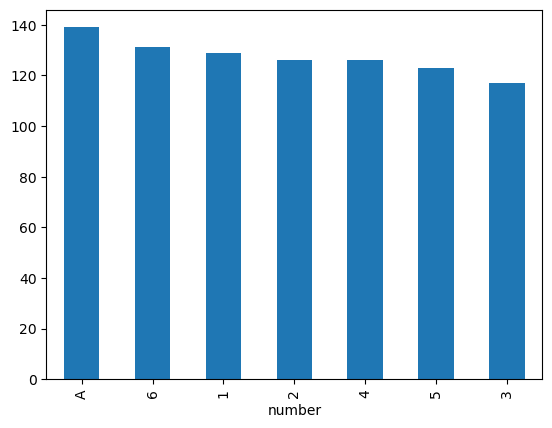

In [5]:
df['number'].value_counts().plot.bar()

# **Numerical and Categorical Data Handling**

In [7]:
df['number_numerical'] = pd.to_numeric(df['number'],errors = 'coerce' , downcast = 'integer') 

In [ ]:
df['categorical_number'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)   # this will impute alphbets on the NAN position 

In [9]:
df

,Cabin,Ticket,number,Survived,number_numerical,categorical_number
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [10]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [11]:
df.drop('number',inplace = True,axis = 1)

In [12]:
df


,Cabin,Ticket,Survived,number_numerical,categorical_number
0,NaN,A/5 21171,0,5.0,NaN
1,C85,PC 17599,1,3.0,NaN
2,NaN,STON/O2. 3101282,1,6.0,NaN
3,C123,113803,1,3.0,NaN
4,NaN,373450,0,NaN,A
...,...,...,...,...,...
886,NaN,211536,0,3.0,NaN
887,B42,112053,1,3.0,NaN
888,NaN,W./C. 6607,0,1.0,NaN
889,C148,111369,1,2.0,NaN


In [13]:
df['cab_num'] = df['Cabin'].str.extract('(\d+)')
df['cab_cat'] = df['Cabin'].str[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_15688\2423832769.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cab_num'] = df['Cabin'].str.extract('(\d+)')


In [14]:
df

,Cabin,Ticket,Survived,number_numerical,categorical_number,cab_num,cab_cat
0,NaN,A/5 21171,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,1,6.0,NaN,NaN,NaN
3,C123,113803,1,3.0,NaN,123,C
4,NaN,373450,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...
886,NaN,211536,0,3.0,NaN,NaN,NaN
887,B42,112053,1,3.0,NaN,42,B
888,NaN,W./C. 6607,0,1.0,NaN,NaN,NaN
889,C148,111369,1,2.0,NaN,148,C


In [15]:
df.drop('Cabin',inplace = True , axis = 1)

In [16]:
df

,Ticket,Survived,number_numerical,categorical_number,cab_num,cab_cat
0,A/5 21171,0,5.0,NaN,NaN,NaN
1,PC 17599,1,3.0,NaN,85,C
2,STON/O2. 3101282,1,6.0,NaN,NaN,NaN
3,113803,1,3.0,NaN,123,C
4,373450,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...
886,211536,0,3.0,NaN,NaN,NaN
887,112053,1,3.0,NaN,42,B
888,W./C. 6607,0,1.0,NaN,NaN,NaN
889,111369,1,2.0,NaN,148,C


In [17]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [18]:
df['Ticket_num'] = df['Ticket'].apply(lambda s : s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors = 'coerce' , downcast = 'integer')

df['Ticket_cat'] = df['Ticket'].apply(lambda s : s.split()[0])
df['Ticket_cat'] = df['Ticket_cat'].str.replace(r'\d+', '', regex=True).replace('', np.nan)


In [19]:
df.drop('Ticket',inplace = True , axis = 1)


In [20]:
df

,Survived,number_numerical,categorical_number,cab_num,cab_cat,Ticket_num,Ticket_cat
0,0,5.0,NaN,NaN,NaN,21171.0,A/
1,1,3.0,NaN,85,C,17599.0,PC
2,1,6.0,NaN,NaN,NaN,3101282.0,STON/O.
3,1,3.0,NaN,123,C,113803.0,NaN
4,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...
886,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,1,3.0,NaN,42,B,112053.0,NaN
888,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,1,2.0,NaN,148,C,111369.0,NaN
